<a href="https://colab.research.google.com/github/ParkStrat/Sales_Predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing tools and dataframe

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mline
from matplotlib import rcParams
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo - Data Science/01. Week 1: Python/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Creating model evaluation tool 

In [4]:
def evaluate(y_train_true, y_train_pred, y_test_true, y_test_pred):
  train_r2 = r2_score(y_train_true, y_train_pred)
  test_r2 = r2_score(y_test_true, y_test_pred)
  train_mse = mean_squared_error(y_train_true, y_train_pred)
  test_mse = mean_squared_error(y_test_true, y_test_pred)
  train_rmse = np.sqrt(train_mse)
  test_rmse = np.sqrt(test_mse)
  print(f'Train r2: {train_r2}\n Test r2: {test_r2}\n Train rmse: {train_rmse}\n Test rmse: {test_rmse}')

# Preprocessing Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Checking for duplicate entries

In [6]:
df.duplicated().sum().sum()

0

Checking for consistant spelling in categorical data

In [7]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Correcting spelling / abbreviation errors for Item_Fat_Content


In [8]:
df.replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace = True)

Adding a column that shows quantitiy of each item sold

In [9]:
Item_Quantity_Sold = df['Item_Outlet_Sales'] / df['Item_MRP']
df['Item_Quantity_Sold'] = Item_Quantity_Sold

Spliting data into train and test groups

In [10]:
X = df.drop(columns = 'Item_Outlet_Sales')
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Creating categortical and numerical column selector

In [11]:
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

Creating desired transformers 

In [12]:
freq_imputer = SimpleImputer(strategy = 'most_frequent')
mean_imputer = SimpleImputer(strategy = 'mean')
scaler = StandardScaler()
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

Creating a preprocessing pipeline

In [13]:
num_preprocessing_pipe = make_pipeline(mean_imputer, scaler)
cat_preprocessing_pipe = make_pipeline(freq_imputer, ohe)

Creating tuples for column transformation

In [14]:
num_tuple = (num_preprocessing_pipe, num_selector)
cat_tuple = (cat_preprocessing_pipe, cat_selector)

Creating a column transformer

In [15]:
column_transformer = make_column_transformer(num_tuple, cat_tuple)

Fit the preprocessing pipline to the training data ONLY to prepare for applying a model

In [16]:
column_transformer.fit(X_train, y_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1016d9a950>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f1016d9a990>

Transform both the training and testing data using the column_transformer fit to the training data

In [17]:
X_train_processed = column_transformer.transform(X_train)
X_test_processed = column_transformer.transform(X_test)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Quantity_Sold         8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

The data is now ready for application of a model

# Data Visualization

## Statistical Analysis

### Frequency Distribution Analysis

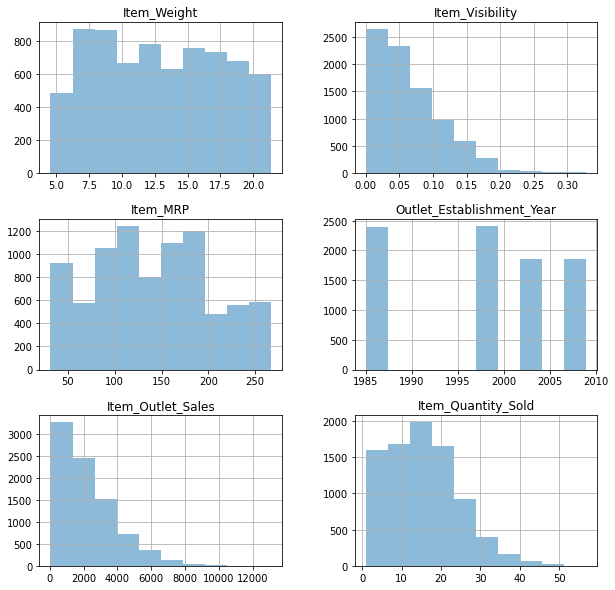

In [19]:
df.hist(alpha = 0.5, figsize = (10, 10));

The above are frequeny distributions (Histograms) for all the numerical categories

* **Item_Weight:** The frequency spike at the mean weight is as a result of the datacleaning method I used (filling in all missing values with the mean value) otherwise Item_Weight has a relatively even distribution

* **Item_Visibility:** Stores only have so much display space and so it makes sense that only a few number of items take up large percentages of display space

* **Item_MRP:** Item MRP has a relatively even distribution

* **Outlet_Establishment_Year:** Nothing significant

* **Item_Outlet_Sales:** This Histogram indicates that there are a larger number of lower profit sales than high profit sales

### Correlation Analysis

Creating a Heatmap to identify potnetial correlations within the dataset

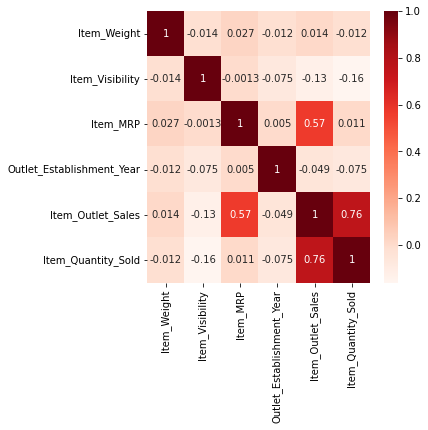

In [20]:
corr = df.corr()
plt.figure(figsize = (5, 5))
sns.heatmap(corr, cmap = 'Reds', annot = True);

This heatmap indicates that only numerical categories that have a correlation are Item_MRP and Item_Outlet_Sales (moderate correlation) and since Item_Quantity_Sold is derived from Item_Outlet_Sales, there is a strong poitive correlation between the two.

Creating a scatter plot to visualize replationship between Item_MRP and Item_Outlet_Sales

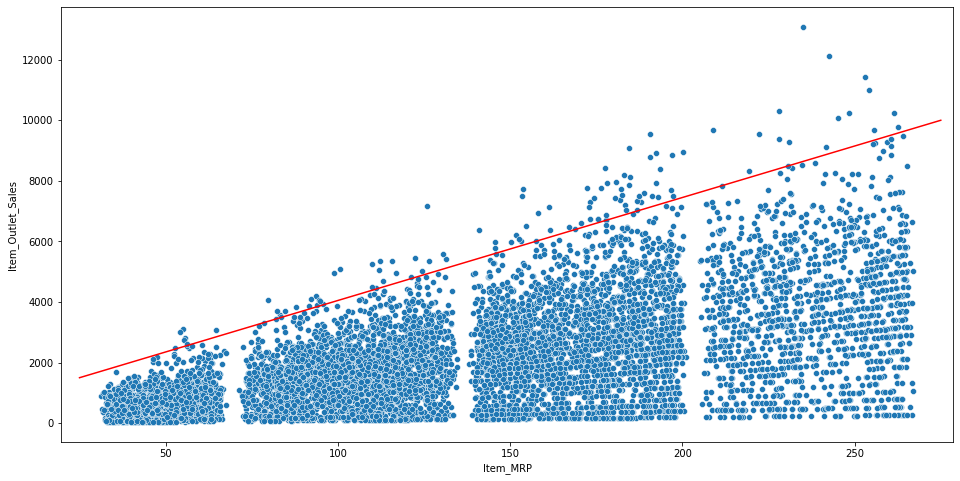

In [21]:
line = mline.Line2D([25, 275], [1500, 10000], color = 'Red')
rcParams['figure.figsize'] = 16,8
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales').add_line(line);

Creatina scatter plot to visualize the relationship btween Item_Outlet_Sales and Item_Quantity_Sold

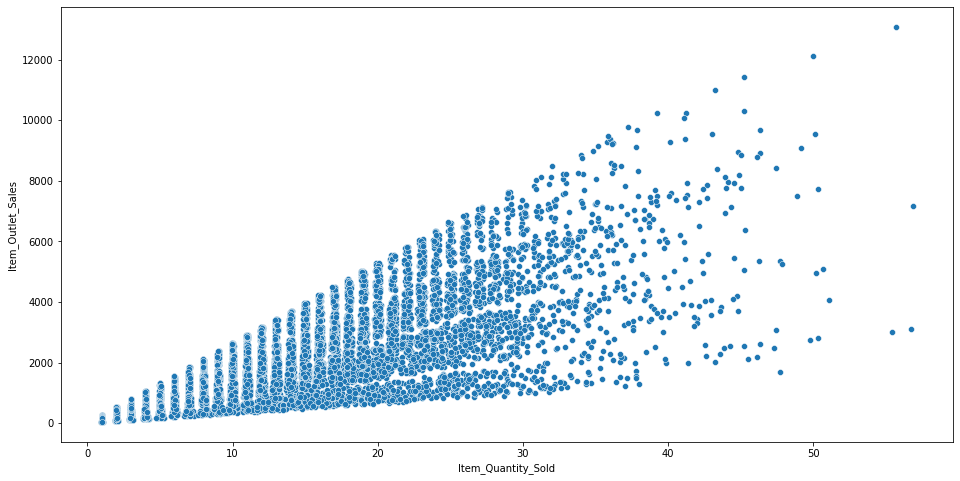

In [22]:
sns.scatterplot(data = df, x = 'Item_Quantity_Sold', y = 'Item_Outlet_Sales');

As the heatmap indicated, there is clearly a correlation between Item_MRP / Item_Outlet_Sales and Item_Outlet_Sales / Item_Quantity_Sold

### Item_MRP, Item_Outlet_Sales, and Outlet Information Analysis

**Outlet_Size**

Creating a scatter plot that compares Item_MRP, Item_Outlet_Sales and Outlet_Size

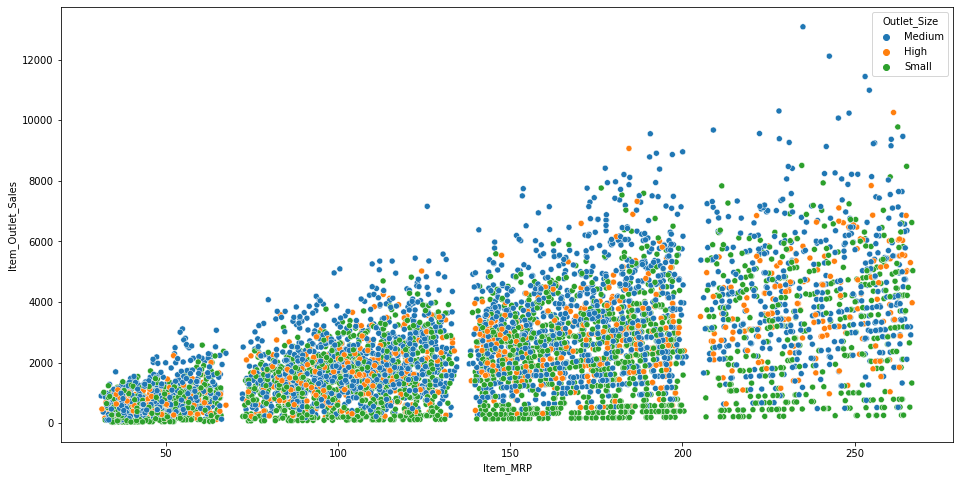

In [23]:
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Outlet_Size');

Creating a Bar Chart that compares Outlet_Size to Item_Outlet_Sales

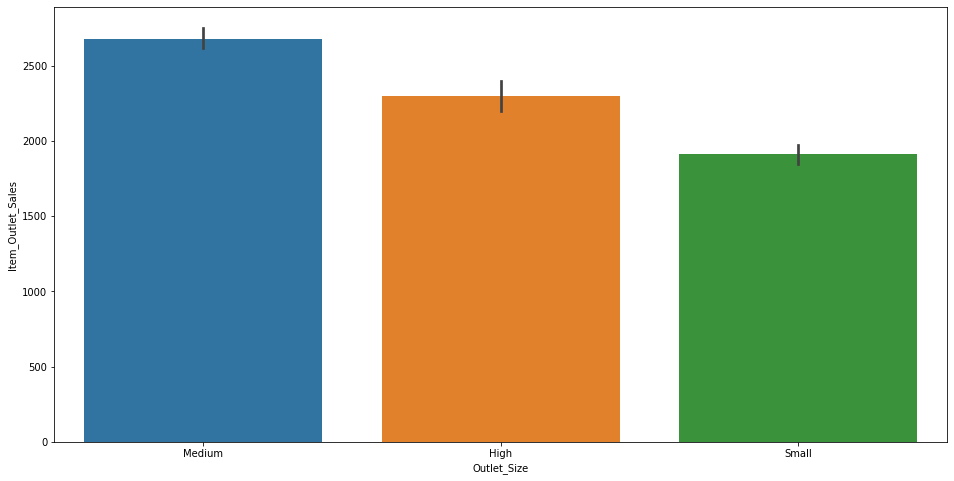

In [24]:
sns.barplot(data = df, x = 'Outlet_Size', y = 'Item_Outlet_Sales');

Creating a box plot that comares Outlet_Size and Item_Outlet_Sales

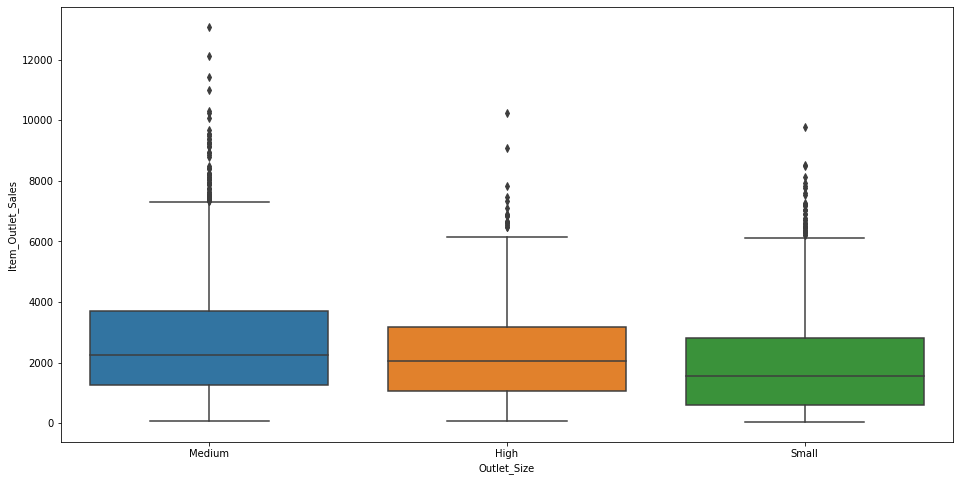

In [25]:
sns.boxplot(data = df, x = 'Outlet_Size', y = 'Item_Outlet_Sales');

These three chart show that Medium size outlets tend to have the highest sales followed by Large (high) sized outlets.

**Outlet Location Type**

Creating a scatter plot that compares Item_MRP, Item_Outlet_Sales and Outlet_Location_Type

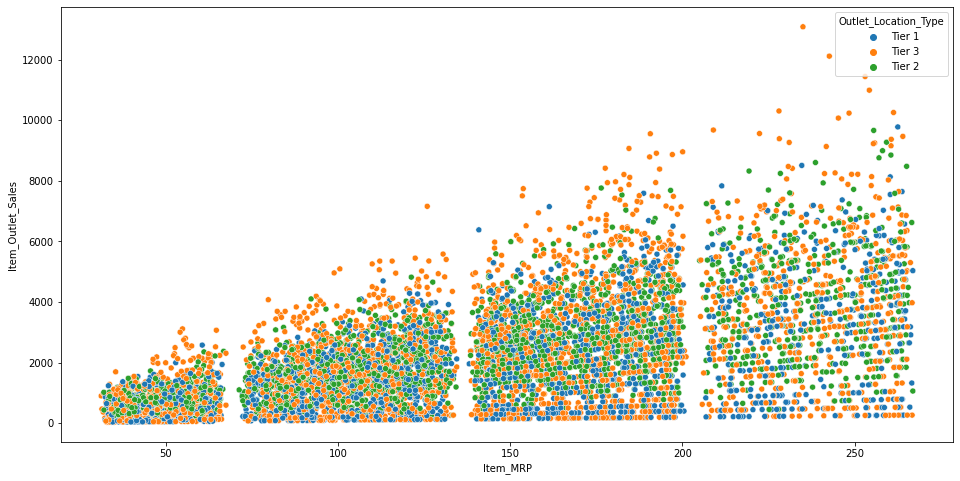

In [26]:
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Outlet_Location_Type');

Creating a Bar Chart that compares Outlet_Size to Outlet_Location_Type

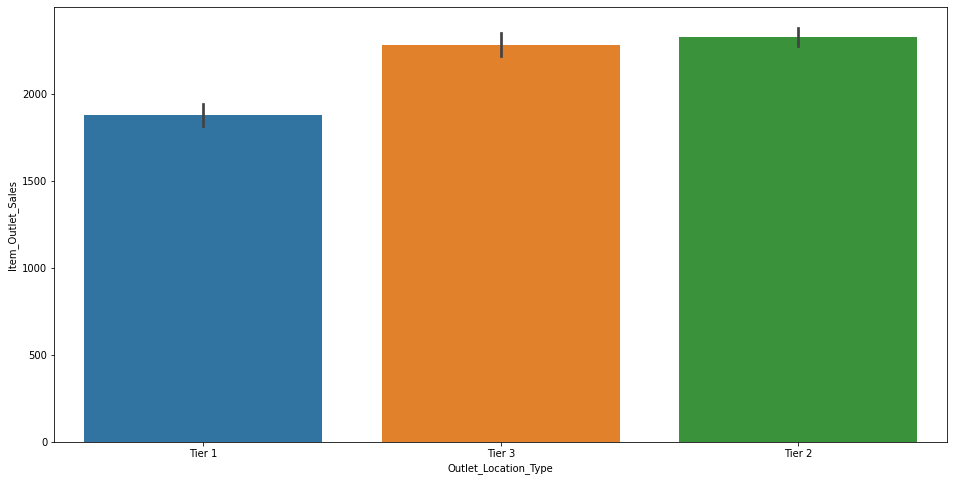

In [27]:
sns.barplot(data = df, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales');

Create a box plot comparing Outlet_Location_Type to Item_Outlet_Sales

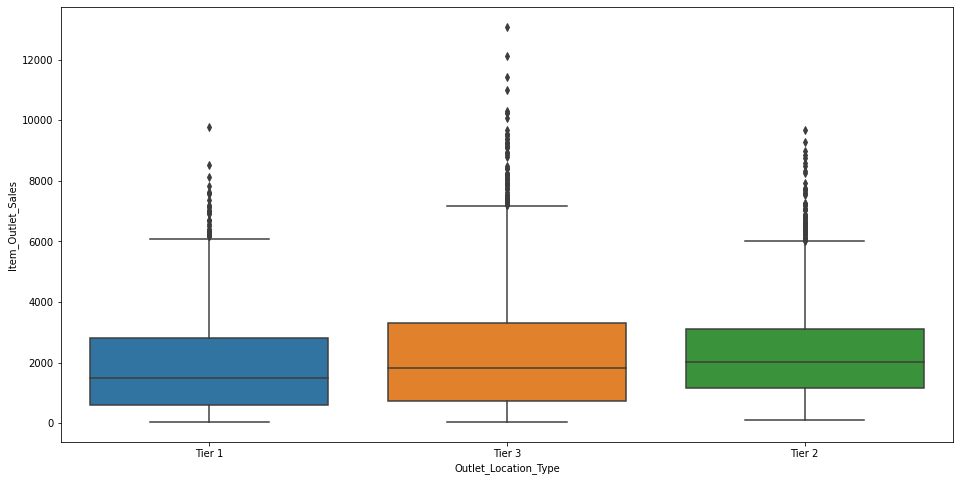

In [28]:
sns.boxplot(data = df, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales');

These three charts indicate Tier 2 & 3 locations have the best sales. Tier 2 has higher average sales while Tier 3 has more outliers on the high end of sales.

**Outlet Type**

Creating a scatter plot comparing Item_MRP, Item_Outlet_Sales, and Outley_Type

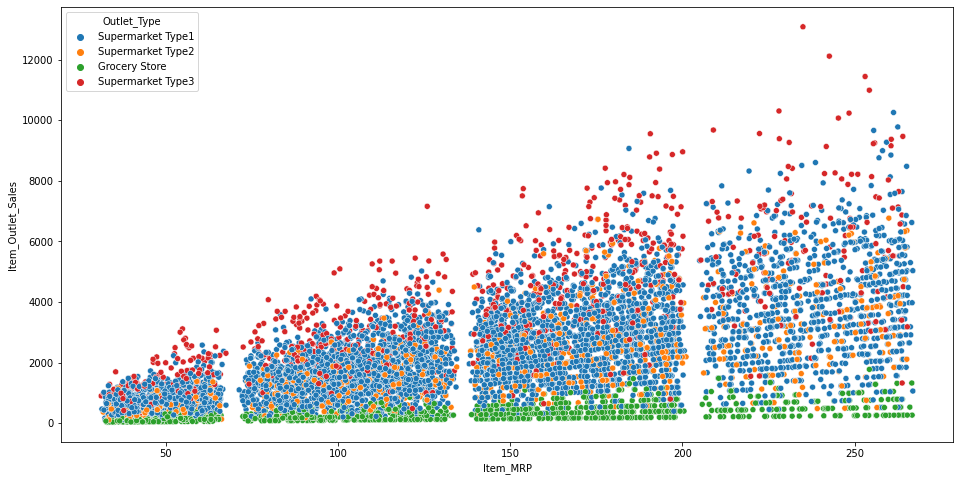

In [29]:
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Outlet_Type');

Creating a bar plot comparing Item_Outlet_Sales and Outlet_Type

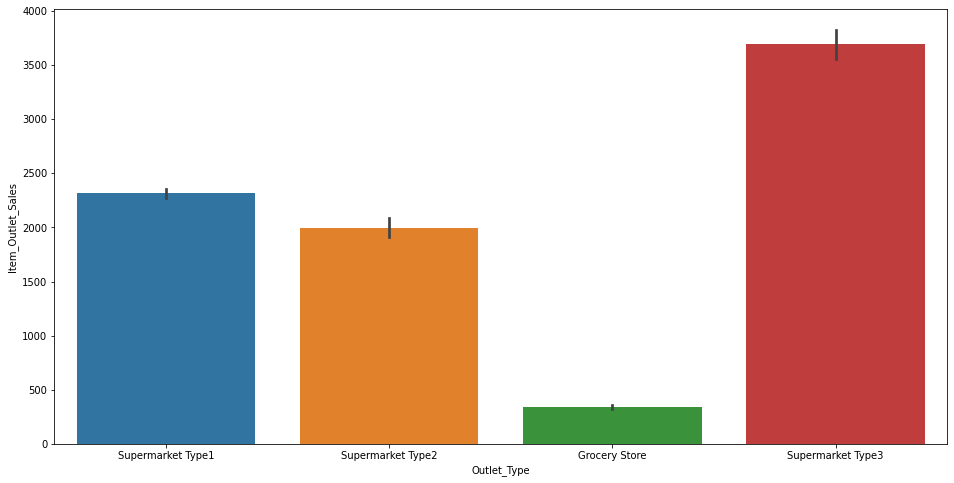

In [30]:
sns.barplot(data = df, x = 'Outlet_Type', y = 'Item_Outlet_Sales');

Create a box plot comparing Outlet_Type to Item_Outlet_Sales

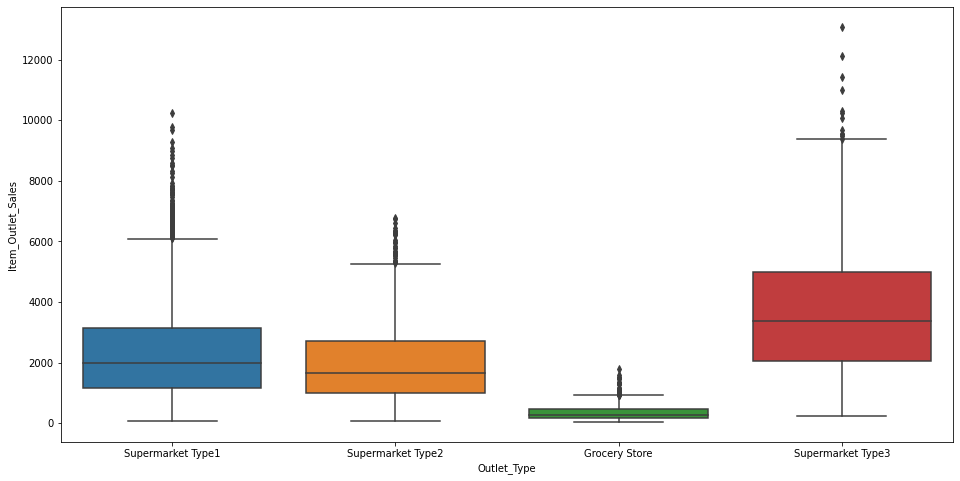

In [31]:
sns.boxplot(data = df, x = 'Outlet_Type', y = 'Item_Outlet_Sales');

These three charts indicate that Supermarket Type 3 have the most sales by far

### Item_MRP, Item_Outlet_Sales and Item Information Analysis

**Item Fat Content**

Creating a scatter plot comparing Item_MRP, Item_Outlet_Sales, and Item_Fat_Content

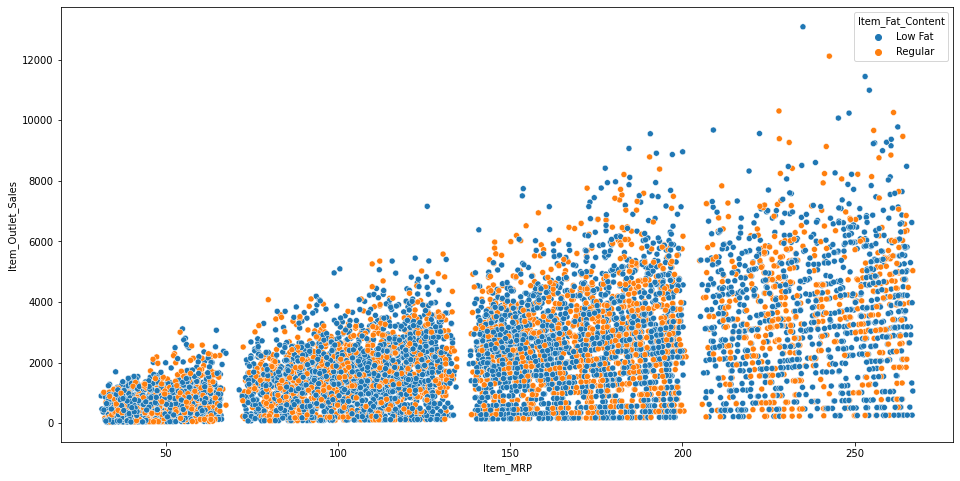

In [32]:
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Item_Fat_Content');

Creating a bar plot comparing Item_Outlet_Sales and Item_Fat_Content

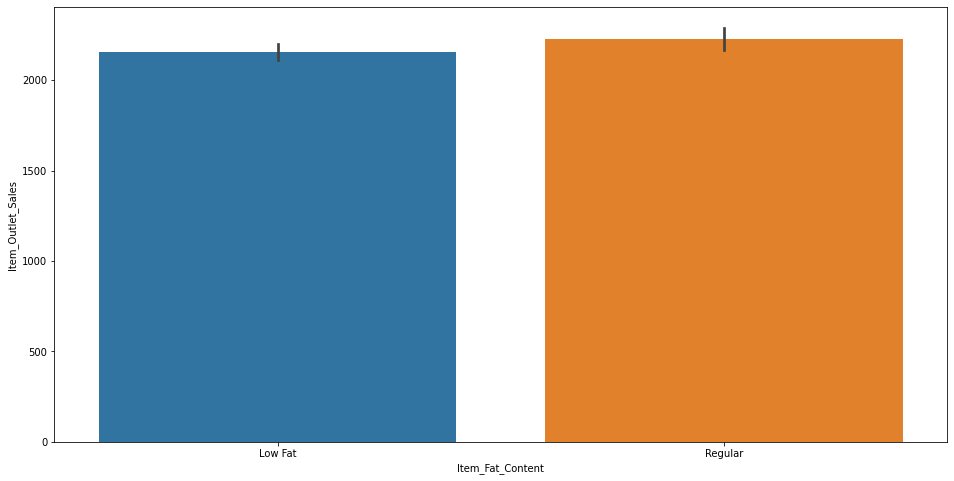

In [33]:
sns.barplot(data = df, x = 'Item_Fat_Content', y = 'Item_Outlet_Sales');

Create a box plot comparing Item_Fat_Content to Item_Outlet_Sales

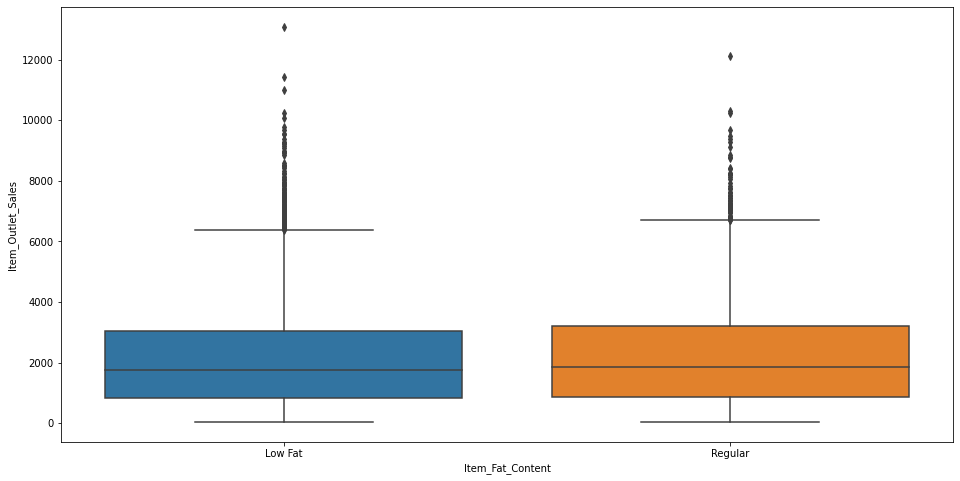

In [34]:
sns.boxplot(data = df, x = 'Item_Fat_Content', y = 'Item_Outlet_Sales');

These three charts indicate there does not seem to be much difference Fat Content when it comes to Item Sales

**Item Weight**

Creating a scatter plot comparing Item_MRP, Item_Outlet_Sales, and Item_Weight

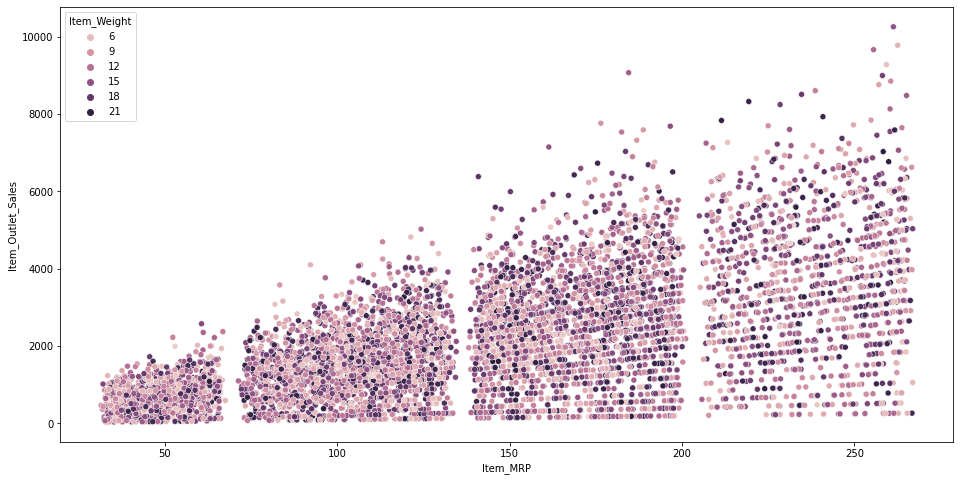

In [35]:
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Item_Weight');

Creating a bar plot comparing Item_Outlet_Sales and Item_Fat_Content

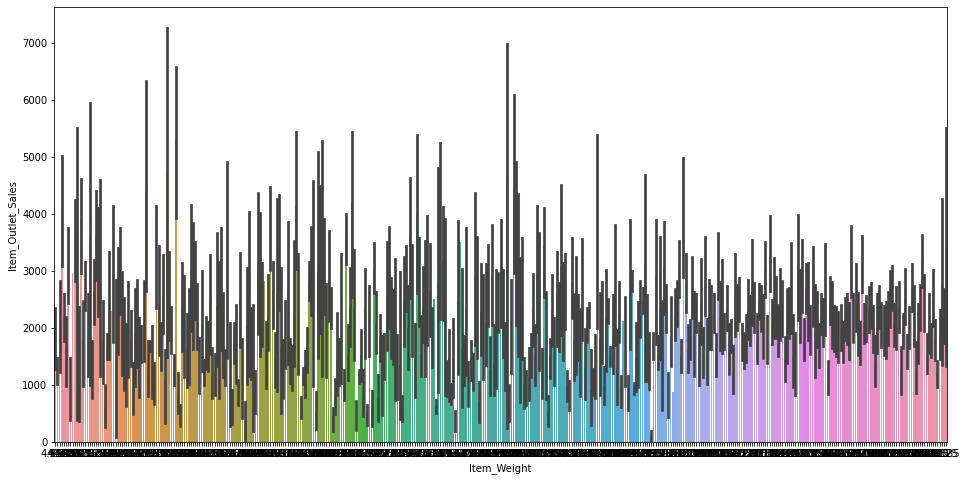

In [36]:
sns.barplot(data = df, x = 'Item_Weight', y = 'Item_Outlet_Sales');

It does not appear that Item Weight has much impact on Item Sales

**Item Visability Analysis**

Create a scatter plot that compares Item_Outlet_Sales, Item_Visibility, and Item_MRP

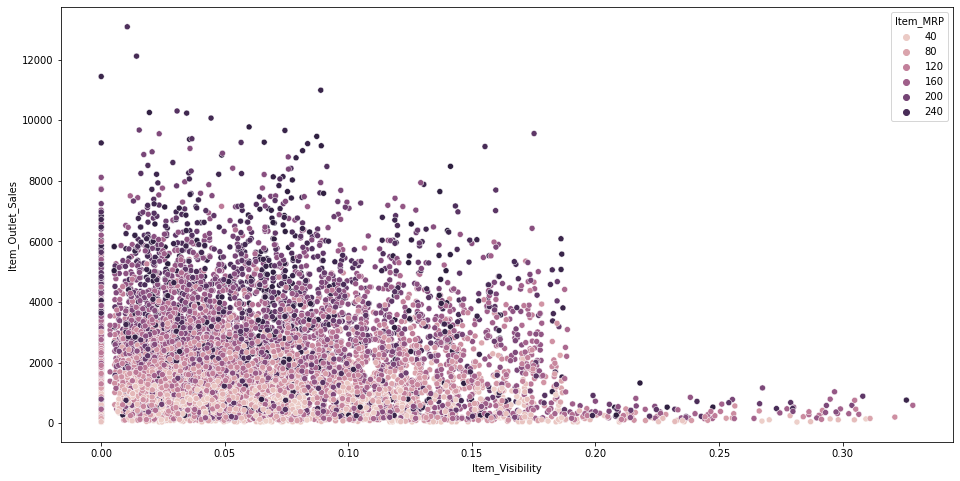

In [37]:
sns.scatterplot(data = df, x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue = 'Item_MRP');

Create a scatter plot that compares Item_Outlet_Sales, Item_Visibility, and Outlet_Type

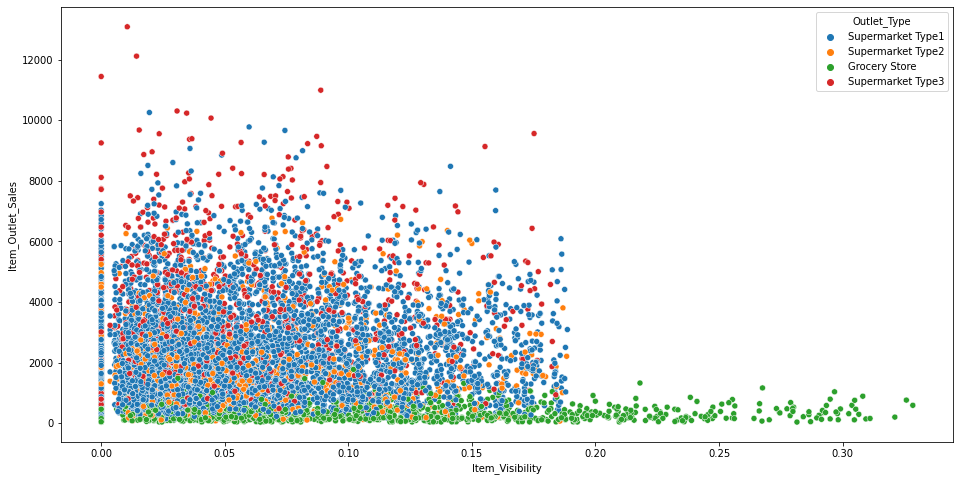

In [38]:
sns.scatterplot(data = df, x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue = 'Outlet_Type');

Create a scatter plot that compares Item_Outlet_Sales, Item_Visibility, and Outlet_Size

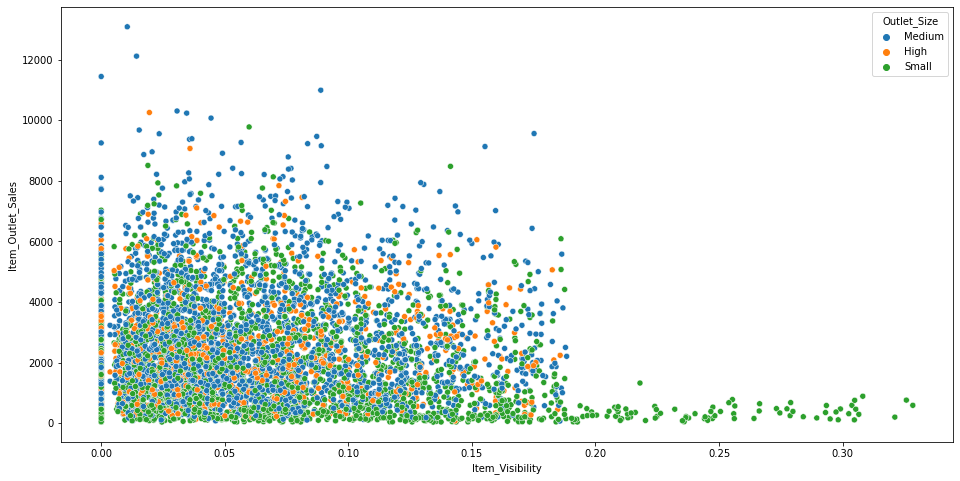

In [39]:
sns.scatterplot(data = df, x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue = 'Outlet_Size');

These three plots indiate that there is a large nunmber of Items that are taking up display space but are not generating high sales. Those items should be switched out with items that have less visibility and higher MRP.


---


**The below calcuations will determine which items to shift to lower visibiltiy and which to swtich to higher visibility.**

Get numerical breakdown of Item_Visibility

In [40]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

Get numerical breakdown of Item_MRP

In [41]:
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

Create boolean filters for Item_Visibility and Item_MRP

In [42]:
lowHalf = df['Item_Visibility'] < 0.05
highVis = df['Item_Visibility'] > 0.19
highMRP = df['Item_MRP'] > 185

Create a filtered dataframe that only contains those items that have a visibility between .05 and .19 and have a MRP under 185

In [43]:
itemsToReduceVis = df[~lowHalf & ~highVis & ~ highMRP]

Get the details of Items that have a visibility between .05 and .19 and have a MRP under 185

In [44]:
itemsToReduceVis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3138 entries, 7 to 8521
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            3138 non-null   object 
 1   Item_Weight                2576 non-null   float64
 2   Item_Fat_Content           3138 non-null   object 
 3   Item_Visibility            3138 non-null   float64
 4   Item_Type                  3138 non-null   object 
 5   Item_MRP                   3138 non-null   float64
 6   Outlet_Identifier          3138 non-null   object 
 7   Outlet_Establishment_Year  3138 non-null   int64  
 8   Outlet_Size                2221 non-null   object 
 9   Outlet_Location_Type       3138 non-null   object 
 10  Outlet_Type                3138 non-null   object 
 11  Item_Outlet_Sales          3138 non-null   float64
 12  Item_Quantity_Sold         3138 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

Create a filtered dataframe that contains those items that should be considered for shifting to higher visibility (Visibility < .09 and MRP > 185)


In [45]:
itemsToIncreaseVis = df[lowHalf & highMRP]

Get the details of Items that have a visibility below .05 and have a MRP over 185

In [46]:
itemsToIncreaseVis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 0 to 8511
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            955 non-null    object 
 1   Item_Weight                812 non-null    float64
 2   Item_Fat_Content           955 non-null    object 
 3   Item_Visibility            955 non-null    float64
 4   Item_Type                  955 non-null    object 
 5   Item_MRP                   955 non-null    float64
 6   Outlet_Identifier          955 non-null    object 
 7   Outlet_Establishment_Year  955 non-null    int64  
 8   Outlet_Size                695 non-null    object 
 9   Outlet_Location_Type       955 non-null    object 
 10  Outlet_Type                955 non-null    object 
 11  Item_Outlet_Sales          955 non-null    float64
 12  Item_Quantity_Sold         955 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 

These calculations show that there are 1174 items that are not producing sales despite taking up above average display space and there are 955 items that have high MRP but have below average display space

### Based on the above analysis, I can draw the following conclusions

* There is a correlation between Item MRP and Item Outlet Sales
> * Higher Item MRP generally results in greater Item Outlet Sales (positive correlation)
* Medium sized stores outsell the large and small
* Store location Tiers 2 & 3 outsell Tier 1 locations
* Supermarkets of Type 3 significantly outsell the other types of stores
* Fat Content and Item Weight had no significant impact on sales
* Item Visibility seems to be the area where greatest imporvement can be achieved
> * Items with low sales are taking up a disproportionately large amount of display space
> * Many items with high MRP (a factor with positive correlation to sales) are under displayed
> * Shifting those items that are underselling and have high visibility (1174 items) to a less visable configuration while shifting those items with high MRP and low visibility (955 items) to higher visibility should result in imporved Outlet sales

## Size vs Sales Visualization

Get information on Outlet_Size Value Counts

In [52]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Create a bar plot that compares the total outlet sales for each outlet size

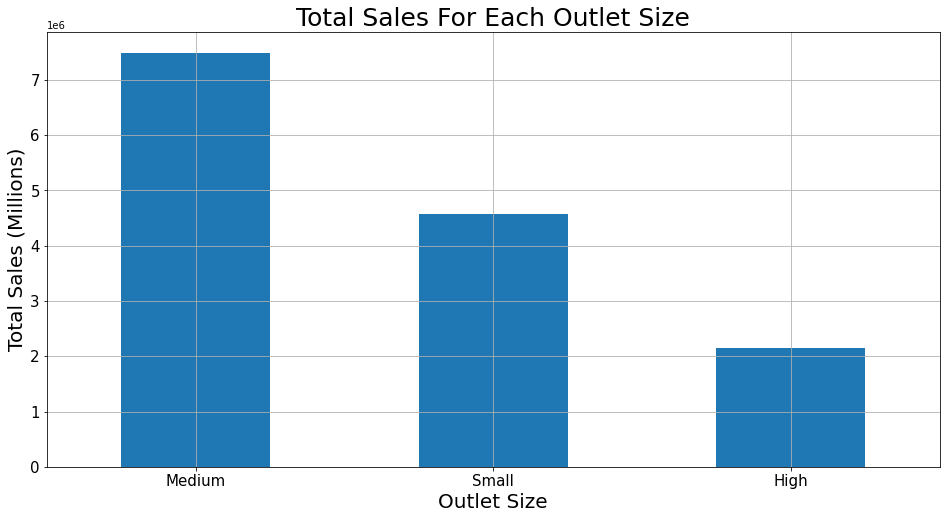

In [53]:
df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum().sort_values(ascending = False).plot.bar()
plt.grid()
plt.title('Total Sales For Each Outlet Size', fontsize = 25)
plt.xlabel('Outlet Size', fontsize = 20)
plt.xticks(rotation = 0, fontsize = 15)
plt.ylabel('Total Sales (Millions)', fontsize = 20)
plt.yticks(fontsize = 15)
plt.savefig('Total Sales by Outlet Size.png', dpi = 300, transparent = True, bbox_inches = 'tight');

This plot shows that medium sized outlets significantly out sell the other store types.

## Incorrect Item Visibility Analysis

Calculating total sales for items that should have increased visibility, items that should have reduced visilibilty, and all items

In [54]:
salesToIncrease = itemsToIncreaseVis['Item_Outlet_Sales'].sum()
salesToReduce = itemsToReduceVis['Item_Outlet_Sales'].sum()
otherSales = df['Item_Outlet_Sales'].sum() - salesToIncrease - salesToReduce
itemSalesSwap = {'Items Lacking Visibility': salesToIncrease, 'Items Too Visible': salesToReduce, 'Correct Visibility': otherSales}

In [71]:
itemsToIncreaseVis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 0 to 8511
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            955 non-null    object 
 1   Item_Weight                812 non-null    float64
 2   Item_Fat_Content           955 non-null    object 
 3   Item_Visibility            955 non-null    float64
 4   Item_Type                  955 non-null    object 
 5   Item_MRP                   955 non-null    float64
 6   Outlet_Identifier          955 non-null    object 
 7   Outlet_Establishment_Year  955 non-null    int64  
 8   Outlet_Size                695 non-null    object 
 9   Outlet_Location_Type       955 non-null    object 
 10  Outlet_Type                955 non-null    object 
 11  Item_Outlet_Sales          955 non-null    float64
 12  Item_Quantity_Sold         955 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 

Calculating the percentages of item sales that could have their visibility shifted and setting up a discitonary 

In [55]:
totalSales = df['Item_Outlet_Sales'].sum()
percentToIncrease = salesToIncrease / totalSales * 100
percentToReduce = salesToReduce / totalSales * 100
everythingElse = 100 - percentToIncrease - percentToReduce
itemVisSwap = {'Items Lacking Visibility': percentToIncrease, 'Items Too Visible': percentToReduce, 'Correct Visibility': everythingElse}

Setting the x and y lists

In [56]:
percent_key = list(itemVisSwap.keys())
percent_vals = list(itemVisSwap.values())
sales_key = list(itemSalesSwap.keys())
sales_vals = list(itemSalesSwap.values())

Create a bar plot that compares the percent of sales for items that could have their visibility shifted

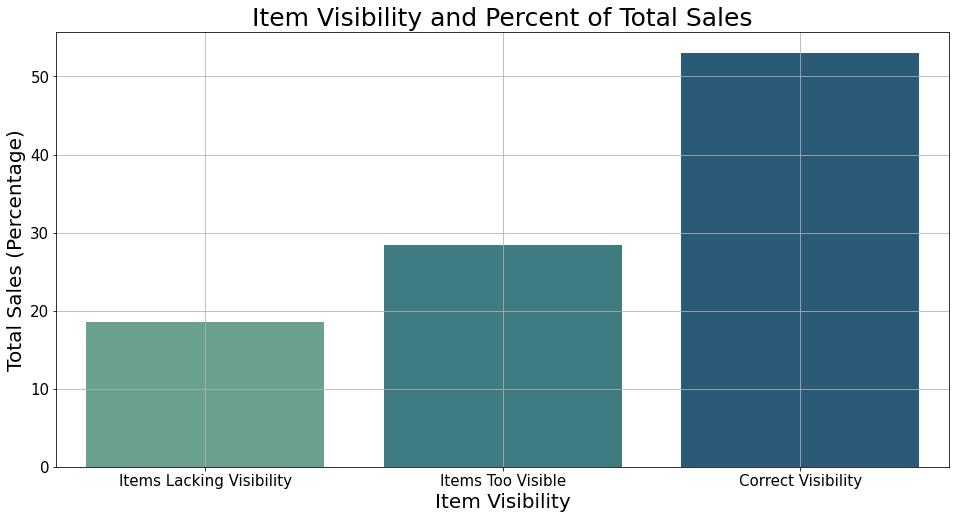

In [57]:
sns.barplot(x = percent_key, y = percent_vals, palette = 'crest')
plt.grid()
plt.title('Item Visibility and Percent of Total Sales', fontsize = 25)
plt.xlabel('Item Visibility', fontsize = 20)
plt.xticks(rotation = 0, fontsize = 15)
plt.ylabel('Total Sales (Percentage)', fontsize = 20)
plt.yticks(fontsize = 15)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('Percent Item Visibility.png', dpi = 300, transparent = True, bbox_inches = 'tight');

This plot shows that almost 20 percent of sales are from items not dsiplayed properly, meaning there is a larged untapped potential for increased sales - the dataframe: itemsToIncreaseVis is a list of all the items that could have increased visibility and the dataframe: itemsToReduceVis is a list of all the itesm that could have decreased visibility

Create a bar plot that compares the total sales for items that could have their visibility shifted

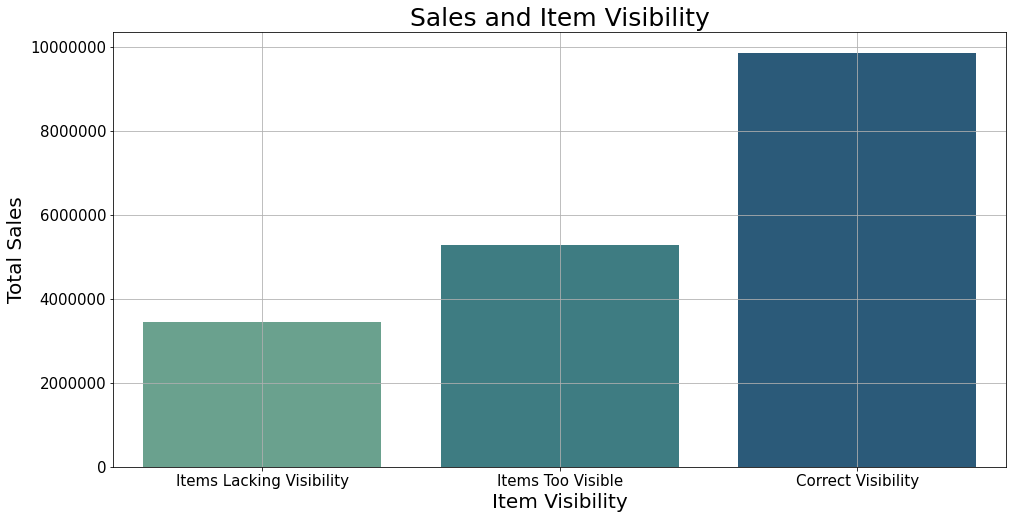

In [58]:
sns.barplot(x = sales_key, y = sales_vals, palette = 'crest')
plt.grid()
plt.title('Sales and Item Visibility', fontsize = 25)
plt.xlabel('Item Visibility', fontsize = 20)
plt.xticks(rotation = 0, fontsize = 15)
plt.ylabel('Total Sales', fontsize = 20)
plt.yticks(fontsize = 15)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('Sales and Item Visibility.png', dpi = 300, transparent = True, bbox_inches = 'tight');

This chart shows that the items that lack visibility but are high MRP are not contributing to the overall sales  

### Determining Profits after changing item visibility

Calculating item average visibility

In [59]:
meanVisIncrease = itemsToIncreaseVis['Item_Visibility'].mean()
meanVisReduce = itemsToReduceVis['Item_Visibility'].mean()
print(f'Average Visibility for Items over displayed: {meanVisReduce}\n Average visibility for Items under displayed: {meanVisIncrease}')

Average Visibility for Items over displayed: 0.09955958966284262
 Average visibility for Items under displayed: 0.024102331942408347


Current Total sales for over and under displayed items

In [60]:
print(f'Total Sales from Items over displayed: {salesToReduce}\n Total Sales from Items under displayed: {salesToIncrease}')

Total Sales from Items over displayed: 5283777.4814
 Total Sales from Items under displayed: 3445017.6474


Calculating Total quantities of items over and under displayed

In [61]:
quantityOverVis = itemsToReduceVis['Item_Quantity_Sold'].sum()
quantityUnderVis = itemsToIncreaseVis['Item_Quantity_Sold'].sum()
print(f'Total Items over displayed sold: {quantityOverVis}\n Total Items under displayed sold: {quantityUnderVis}')

Total Items over displayed sold: 47104.5486644502
 Total Items under displayed sold: 15544.479010538282


Finding average MRPs

In [62]:
MRP_Avg_OverVis = itemsToReduceVis['Item_MRP'].mean()
MRP_Avg_UnderVis = itemsToIncreaseVis['Item_MRP'].mean()
print(f'Average MRP for over displayed items: {MRP_Avg_OverVis}\n Average MRP for under displayed items: {MRP_Avg_UnderVis}')

Average MRP for over displayed items: 112.41788929254312
 Average MRP for under displayed items: 221.4692163350785


Calculating potential sales if visibility swapped between under displayed (high MRP) items and over displayed (low MRP) items. This assumes similar quantity of items sold based on the item visibility 

In [63]:
NewSalesOverVis = MRP_Avg_OverVis * quantityUnderVis
NewSalesUnderVis = MRP_Avg_UnderVis * quantityOverVis
print(f'New Total Sales from Items over displayed: {NewSalesOverVis}\n New Total Sales from Items under displayed: {NewSalesUnderVis}')

New Total Sales from Items over displayed: 1747477.5205169527
 New Total Sales from Items under displayed: 10432207.478533356


In [77]:
test = totalSales - salesToIncrease - salesToReduce + NewSalesUnderVis + NewSalesOverVis

In [64]:
newItemSalesSwap = {'Items Previously Lacking Visibility': NewSalesUnderVis, 'Items Previously Too Visible': NewSalesOverVis, 'Correct Visibility': otherSales}

In [65]:
new_key = list(newItemSalesSwap.keys())
new_vals = list(newItemSalesSwap.values())

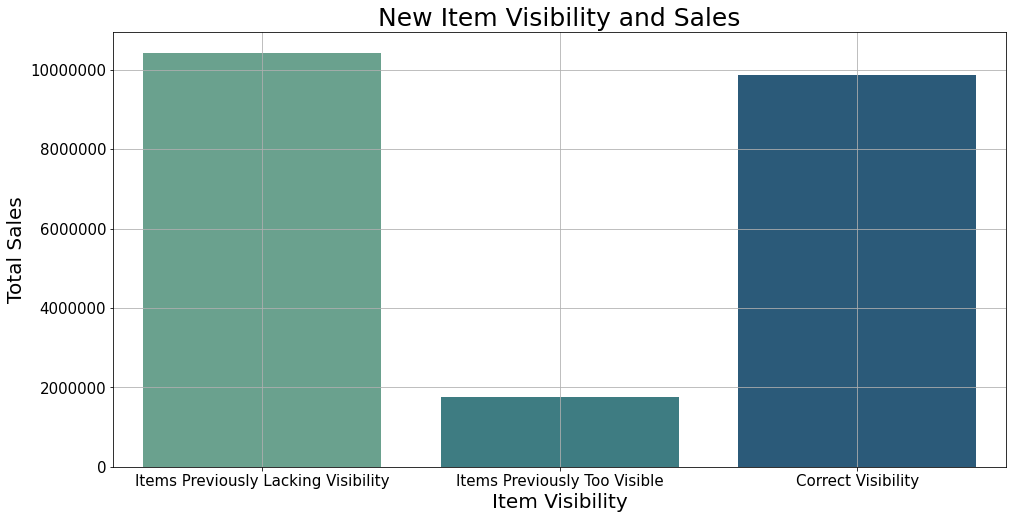

In [66]:
sns.barplot(x = new_key, y = new_vals, palette = 'crest')
plt.grid()
plt.title('New Item Visibility and Sales', fontsize = 25)
plt.xlabel('Item Visibility', fontsize = 20)
plt.xticks(rotation = 0, fontsize = 15)
plt.ylabel('Total Sales', fontsize = 20)
plt.yticks(fontsize = 15)
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('New Visibility.png', dpi = 300, transparent = True, bbox_inches = 'tight');

This chart shows that if given the same leve of display space (and therefore similar assumed number of sales) that sales can be dramatically increased for items with a high MRP

Exporting the dataframes that contain items that should occupy less display space and those that should occupy more.

In [67]:
increaseitem_file_name = 'Items Needing More Display Space.xlsx'
itemsToIncreaseVis.to_excel(increaseitem_file_name)
decreaseitem_file_name = 'Items Needing Less Display Space.xlsx'
itemsToReduceVis.to_excel(decreaseitem_file_name)

# Modeling and Model Evaluation

## Linear Regression Modeling and Evaluation

Instantiating the Linear Regression model

In [ ]:
lin_reg = LinearRegression()

Fitting model to training data ONLY

In [ ]:
lin_reg.fit(X_train_processed, y_train)

LinearRegression()

Make predictiong for both training and testing data

In [ ]:
lr_y_train_pred = lin_reg.predict(X_train_processed)
lr_y_test_pred = lin_reg.predict(X_test_processed)

Evaluate model performance on training and testing data

In [ ]:
evaluate(y_train, lr_y_train_pred, y_test, lr_y_test_pred)

Train r2: 0.6715343143255618
 Test r2: -3.656401257297658e+18
 Train rmse: 985.9409958057549
 Test rmse: 3176149874296.226


## Random Forest Regression Modeling and Evaluation

Instantiate the random forset regression model

In [ ]:
rf_reg = RandomForestRegressor(n_estimators = 200, max_depth = 20, random_state = 42)

Fitting model to training data ONLY

In [ ]:
rf_reg.fit(X_train_processed, y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

Making predictions on training and testing datasets

In [ ]:
rf_y_train_pred = rf_reg.predict(X_train_processed)
rf_y_test_pred = rf_reg.predict(X_test_processed)

Attempt 1: Evaluate model performance for both training and testing datasets (default tuning)

In [ ]:
evaluate(y_train, rf_y_train_pred, y_test, rf_y_test_pred)

Train r2: 0.9377687442438645
 Test r2: 0.5491541556134145
 Train rmse: 429.15107461982024
 Test rmse: 1115.2907445884248


Attempt 2 (n_estimators = 1000 & max_depth = 100)

In [ ]:
evaluate(y_train, rf_y_train_pred, y_test, rf_y_test_pred)

Train r2: 0.9398911620979583
 Test r2: 0.5506712002390775
 Train rmse: 421.769419495605
 Test rmse: 1113.412750644526


Attempt 3 (n_estimators = 100 & max_depth = 10)

In [ ]:
evaluate(y_train, rf_y_train_pred, y_test, rf_y_test_pred)

Train r2: 0.6865899418772128
 Test r2: 0.5967424544304929
 Train rmse: 963.0800508615487
 Test rmse: 1054.7883244343043


Attempt 4 (n_estimators = 300 & max_depth = 30)

In [ ]:
evaluate(y_train, rf_y_train_pred, y_test, rf_y_test_pred)

Train r2: 0.9098602331102386
 Test r2: 0.5582142458822917
 Train rmse: 516.4926401475616
 Test rmse: 1104.0275638258731


Attempt 5 (n_estimators = 60 & max_depth = 10)

In [ ]:
evaluate(y_train, rf_y_train_pred, y_test, rf_y_test_pred)

Train r2: 0.6862101591160906
 Test r2: 0.5964642316995339
 Train rmse: 963.663392801847
 Test rmse: 1055.1521310022524


Attempt 6 (n_estimators = 200 & max_depth = 20)

In [ ]:
evaluate(y_train, rf_y_train_pred, y_test, rf_y_test_pred)

Train r2: 0.8382104201051073
 Test r2: 0.5741914820409564
 Train rmse: 691.9603277304961
 Test rmse: 1083.8800810069413


## Overall the Random Forest Regression model produces much better results
* The Linear Regression model only produced a r2 score of ~ 0.67 on the training data and ~ -3.6 on the testing data while the Random Forest Regression model produced ~ 0.69 on the training data and ~ 0.6 on the testing data (attempt # 3 of 6)
* Similarly the Linear Regression Root Mean Square Error was orders of magnatude worse that the Random Forest Regression Model